## 선형 판별분석과 이차 판별분석

### 판별분석

질적 척도로 이루어진 종속변수를 분류할 때 사용
- 최소제곱법을 사용하는 추정방법을 통해 독립변수의 최적 가중치를 구함
- 독립변수들이 정규분포를 이루지 않더라도 사용가능
- 로지스틱보다 더 적은 데이터로도 높은 성능을 뽑을 수 있음

종속변수의 범주가 2개일 경우
- 일반 판별 분석, 두 집단 판별 분석

종속변수의 범주가 3개 이상일 경우
- 다중 판별분석



## 선형 판별분석

분류 모델과 차원 축소에 사용

- PCA와의 차이점: 종속변수를 사용하는 지도학습으로 차원을 축소
- 종속변수의 범주 간 분별 정보를 최대한 유지시키면서 차원을 축소시키는 방식으로 데이터의 오분류율이 최소가 되는 축을 찾음

### 선형 판별함수
전체 범주의 분류 오차를 최소화하는 선형 판별함수를 도출한 다음 모든 관측치의 분류 점수를 도출함   
분류점수를 통해 해당 관측칙 어느 범주에 속할 것인지 예측할 수 있음
- 집단 내 분산에 비해 집단 간 분산의 차이를 극대화하는 독립변수의 함수를 찾음

선형 판별 분석의 순서   

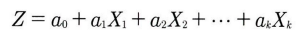

1. 판별상수를 더해준다
2. 독렵변수의 값에 판별계수를 곱한 값을 모두 더해준다
3. 각 범주에 대한 선형 판별함수를 도출한다
4. 관측치에 대하여 각 범주별 분류점수를 계산한다
5. 가장 큰 분류점수를 갖는 범주로 관측치를 분류해준다


선형판별 분석의 전제 조건

1. 데이터가 정규 분포한다
2. 각각의 범주들은 동일한 공분산 행렬을 갖는다
3. 독립변수들은 통계적으로 상호 독립적이다
- 3번이 성립하지 않을 경우 이차 판별분석을 사용한다     

>1,3번 직선 보다 2번 직선이 데이터를 가장 잘 분류해준다     

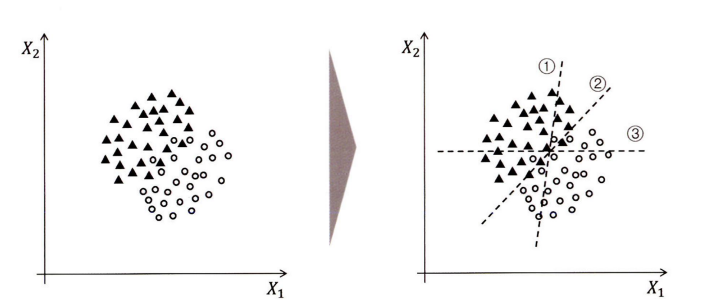


> 최적의 각도를 찾는 원리       

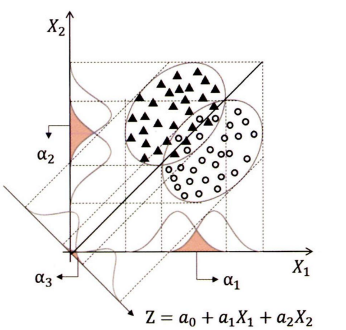

X_1만으로 두 집단을 분류할 경우, 오분류의 크기는 $\alpha_1$이고, X_2만으로 두 집단을 분류할 경우 오분류의 크기는 $\alpha_2이다. X_1,X_2를 모두 사용하면 각 변수에 각도를 조정할 수 있는 계숫값을 조정해주면서 최적의 일차방정식을 도출한다.     
오분류의 크기 $\alpha$가 최소화되는 직선의 함수식이 완성되면, 각 관측치의 변숫값을 대입하여 분류점수를 구할 수 있다     
위 그림에서는 $\alpha_3$이 가장 작은 오분류가 된다      
변수가 늘어가도 선형판별 함수 도출 과정은 동일하다

판별분석도 독립변수들 간 조합을 통해 최적의 분류식을 만드는 방식이기 때문에 전진선택법, 후진제거법, 단계적 선택법 등의 변수선택방법을 사용하여 모델의 성능을 향상시키는 것이 좋다

>판별분석의 분류점수를 계산하는 방법        

연령과 연 수익에 따른 자동차보유 여부를 예측하는 모델을 만들었을 때, 아래와 같은 결과값이 나왔다고 하자

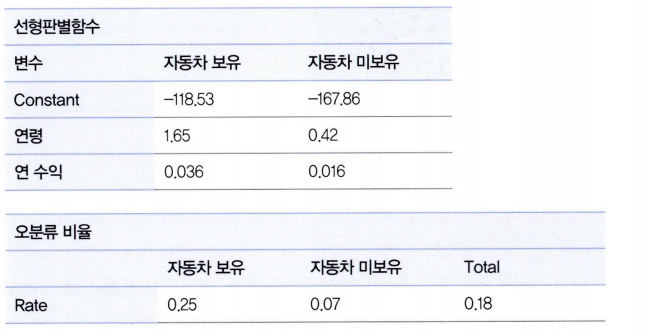

Constant는 선형 판별함수의 상수를 의미하며, 각 변수에 표기된 값은 계수를 의미한다   
따라서 A라는 사람이 30세에 연 수익이 3000만원이라면, 자동차 보유 범주에 대한 분류 점수는 $-118.53+1.65*30+0.036*3=38.97$이다. 동일한 방식으로 자동차 미보유에 대해 분류 점수를 계산하면 5.34가 나온다. 자동차 보유 점수가 더 높기 때문에 A는 자동차 보유 범주로 분류된다
    




## 이차 판별 분석

선형 판별 분석이 공분산 고자가 많이 다른 범주의 데이터를 잘 분류하지 못한다는 단점을 보완한 방법

장점: 비선형 분류가 가능
단점: 독립변수가 많을 경우 추정해야 하는 모수가 많아져서 선형 판별분석에 비해 연산량이 큼

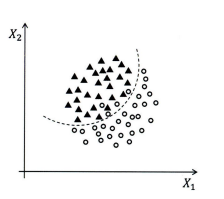

사진처럼 변수에 제곱을 취한 추가적인 변수들을 사용해서 결정경계선을 곡선의 형태로 만들어준다



In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("bodyPerformance.csv")
df. head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


C:\Users\pjung\AppData\Local\Temp\ipykernel_11304\3363634258.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=fill`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(x=df_man.height_cm, y=df_man.weight_kg, cmap="Blues", shade='fill', cbar=False, ax=ax)
C:\Users\pjung\AppData\Local\Temp\ipykernel_11304\3363634258.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(x=df_woman.height_cm, y=df_woman.weight_kg, cmap="Reds", shade=False, ax=ax)


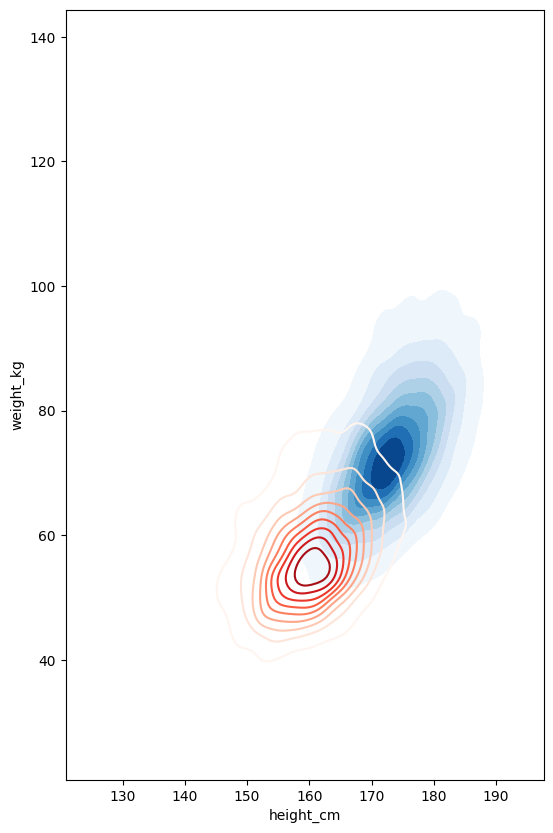

In [17]:
# 성별 분포 시각화 (키X몸무게)

# 성별 구분 데이터셋 생성
# .loc: 특정 column 선택
df_man = df.loc[df['gender'] == 'M']
df_woman = df.loc[df['gender'] == 'F']

# 그래프 설정
f, ax = plt.subplots(figsize=(10, 10))
# x축, y축 1:1 비율로 설정
ax.set_aspect("equal")

# 가로길이, 세로길이 변수 축 설정
# kdeplot은 명시적으로 x,y 지정해주기
ax = sns.kdeplot(x=df_man.height_cm, y=df_man.weight_kg, cmap="Blues", shade='fill', cbar=False, ax=ax)
ax = sns.kdeplot(x=df_woman.height_cm, y=df_woman.weight_kg, cmap="Reds", shade=False, ax=ax)

plt.show()

In [19]:
# 독립변수 정규화

# 독립변수, 종속변수 분리
#.drop([x],축 지정), 축 따라서 성별, 나이, 클라스 제거
df_x = df.drop(['gender','age','class'],axis=1)
df_y = df[['gender']]

# 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df_x)

# 컬럼명 결합
df_x = pd.DataFrame(data=df_minmax,columns=df_x.columns)

df_x.head()

,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,0.687500,0.437746,0.242706,0.512164,0.646766,0.778723,0.182353,0.7500,0.716172
1,0.581395,0.263864,0.168435,0.492958,0.626866,0.516312,0.173529,0.6625,0.755776
2,0.793605,0.462433,0.226790,0.588988,0.756219,0.635461,0.155462,0.6125,0.597360
3,0.719477,0.400716,0.204244,0.486556,0.731343,0.587234,0.168908,0.6625,0.722772
4,0.709302,0.370304,0.187003,0.448143,0.631841,0.617021,0.218908,0.5625,0.716172


In [20]:
# 학습셋과 테스트셋 분리하여 생성(7:3)
x_train, x_test, y_train, y_test = train_test_split(
    df_x,df_y,test_size=0.3,random_state=10)

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  9375
test data 개수:  4018


In [22]:
# 선형 판별분석 모델 적용

LDA_1=LinearDiscriminantAnalysis(store_covariance=True)

 # LDA 적합
LDA_1.fit(x_train, y_train)
y_train_pred=LDA_1.predict(x_train)
y_test_pred=LDA_1.predict(x_test)

# 학습셋 accuracy
print(accuracy_score(y_train, y_train_pred)) 
# 테스트셋 accuracy
print(accuracy_score(y_test, y_test_pred)) 

0.9784533333333333
0.9810851169736187


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
# 선형 판별분석 모델 상수와 계수 값 출력

print('Intercept: ', LDA_1.intercept_)
print('Coefficient: ', LDA_1.coef_)

Intercept:  [-14.29894437]
Coefficient:  [[ -1.35700815  26.12716198 -29.708912     4.0661269   10.03194981
   18.0750803  -57.34544185  -3.81399695  15.48677609]]


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pjung\AppData\Local\Temp\ipykernel_26196\3780834705.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['gender'] == 'M', 'height_cm'],
C:\Users\pjung\AppData\Local\Temp\ipykernel_26196\3780834705.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
s

<Axes: xlabel='lda_component'>

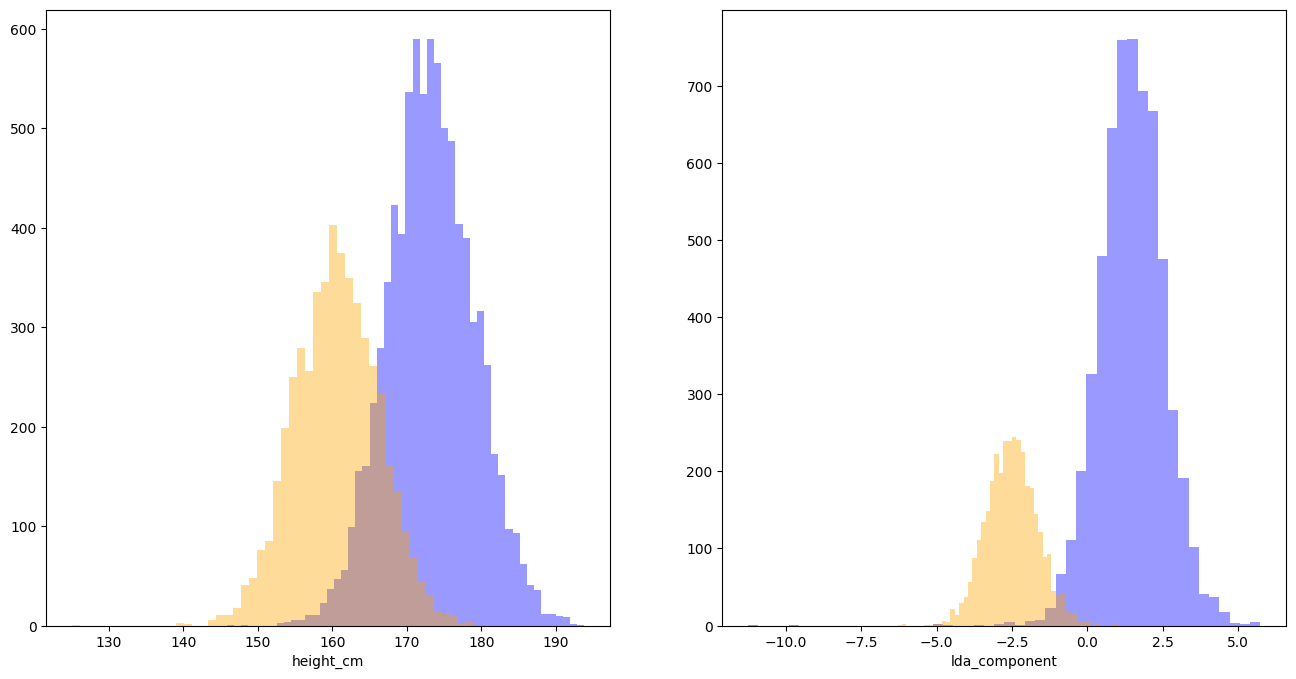

In [12]:
# 선형 판별분석 차원축소 적용

# 주성분 한개로 설정
lda_com = LinearDiscriminantAnalysis(n_components=1)
lda_com.fit(x_train, y_train)
df_lda_com = lda_com.transform(x_train)
df_lda_component = pd.DataFrame(df_lda_com,columns=['lda_component'])

# 종속변수 데이터셋 인덱스 초기화 및 결합
y_train_index = y_train.reset_index()
df_lda_component['target'] = y_train_index['gender']

# 차원축소 요소 분별력 비교 시각화 설정
fig, axs = plt.subplots(figsize=(16,8) , ncols=2 , nrows=1)

# 키 요소의 분별력
sns.distplot(df.loc[df['gender'] == 'M', 'height_cm'], 
             hist=True, kde=False, color="blue", 
             label = 'man', ax=axs[0])
sns.distplot(df.loc[df['gender'] == 'F', 'height_cm'], 
             hist=True, kde=False, color="orange", 
             label = 'woman', ax=axs[0])

# 차원축소 주성분의 분별력
sns.distplot(df_lda_component.loc[df_lda_component['target'] == 'M', 'lda_component'], 
             hist=True, kde=False, color="blue", label = 'man', ax=axs[1])
sns.distplot(df_lda_component.loc[df_lda_component['target'] == 'F', 'lda_component'], 
             hist=True, kde=False, color="orange", label = 'woman', ax=axs[1])

In [ ]:
# 이차 판별분석 모델 적용

qda=QuadraticDiscriminantAnalysis(store_covariance=True)

# QDA 적합
qda.fit(x_train, y_train) 
qda_y_train_pred=qda.predict(x_train)
qda_y_test_pred=qda.predict(x_test)

# 학습셋 정확도
print(accuracy_score(y_train, qda_y_train_pred)) 
# 예측셋 정확도
print(accuracy_score(y_test, qda_y_test_pred))

0.98048
0.9798407167745147


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
# 이차 판별분석 모델 성능 리포트 출력

print(classification_report(y_test, qda_y_test_pred))

              precision    recall  f1-score   support

           F       0.97      0.97      0.97      1463
           M       0.98      0.98      0.98      2555

    accuracy                           0.98      4018
   macro avg       0.98      0.98      0.98      4018
weighted avg       0.98      0.98      0.98      4018



## 서포트벡터머신(SVM)

범주를 나눠줄 수 있는 최적의 구분선을 찾아내어 관측치의 범주를 예측해줌

장점: 비선형 데이터에서 높은 정확도를 보이며, 다른 모델들보다 과적합 되는 경우가 적음   
단점: 이진 분류에만 사용가능

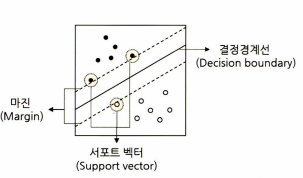

마진: 결정 경계선과 서포트 벡터 사이의 거리
서포트 벡터: 결정경계선의 위치와 각도를 정해줄 수 있는 기준이 되는 관측치
SVM은 마진이 최대가 되도록 만든다

독립변수가 K개라고 할 때 최소 K개의 서포트 벡터가 최적의 결정경계선을 찾기 위해 필요하다

2차원에서는 선, 3차원에서는 평면, 3차원 이상에서는 초평면이 결정 경계선이 된다

결졍 경계선은 아래와 같이 표현된다



W: 가중치 벡터
X: 각 독립변수
b: 편향값

소프트 마진: 마진을 최대화하여 과적합을 방지해줌(이상치 허용)

하드 마진: 이상치를 허용하지 않는 방법   

조정 매개변수: C/Gamma

C: 낮게 설정하면 이상치들이 있을 가능성을 높게 잡아줌(소프트 마진), 반대로 높게 설정하면 이상치들이 있을 가능성을 낮게 만들어줌(하드 마진)

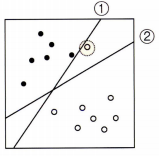
   
Gamme: 커질수록 각각의 관측치에 대한 결정 경계선 범위가 작아져서 여러개의 결정경계썬이 생기게 됨

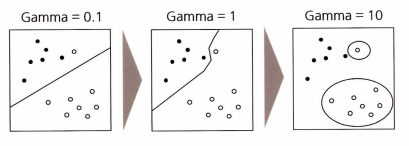



In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.svm as svm
from sklearn.svm import SVC
import pandas as pd

In [25]:
df = pd.read_excel("Raisin_Dataset.xlsx")

In [26]:
# 독립변수 정규화

# 독립변수, 종속변수 분리
df_x = df.drop(['Area','Class'],axis=1)
df_y = df[['Class']]

# 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df_x)

# 컬럼명 결합
df_x = pd.DataFrame(data=df_minmax, columns=df_x.columns)

df_x.head()

,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,0.280714,0.314376,0.767872,0.255504,0.831422,0.271791
1,0.234638,0.284945,0.738636,0.208864,0.667854,0.241842
2,0.280741,0.351778,0.733009,0.268084,0.565754,0.283594
3,0.078935,0.186620,0.548194,0.084089,0.701809,0.108284
4,0.164011,0.422064,0.350968,0.219472,0.906315,0.218493


In [27]:
# 학습셋과 테스트셋 분리하여 생성(6:4)

x_train, x_test, y_train, y_test = train_test_split(
    df_x,df_y,test_size=0.4,random_state=10)

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  540
test data 개수:  360


In [ ]:
# 선형 SVM 모델 성능 확인

#3차항(degree), 학습 반복횟수(max_iter) 10000 설정
#rbf: 선형모델 옵션
#gama: outo
#c: 10
#max_iter: 반복횟수 =1000
svm_model = SVC(kernel = 'linear', degree = 3, gamma = 'auto', C=10, max_iter = 1000)

svm_model.fit(x_train,y_train)

print(svm_model.score(x_train,y_train))
print(svm_model.score(x_test, y_test))

0.8648148148148148
0.8638888888888889


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# SVM C값 1~30에 따른 모델 성능 확인
# 15일 때 최적 확인
scores = []
for C_point in [*range(1,31)]:
      
    svc=SVC(kernel='rbf',C=C_point,max_iter = 1000)
    C_model=svc.fit(x_train, y_train)
    train_score = C_model.score(x_train, y_train)
    test_score = C_model.score(x_test, y_test)
    print("rbf SVM : C:{}, train set score:{:2f}, test set score:{:2f}".format
          (C_point,train_score, test_score))
    scores.append([train_score, test_score])

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

rbf SVM : C:1, train set score:0.857407, test set score:0.883333
rbf SVM : C:2, train set score:0.864815, test set score:0.880556
rbf SVM : C:3, train set score:0.862963, test set score:0.886111
rbf SVM : C:4, train set score:0.861111, test set score:0.880556
rbf SVM : C:5, train set score:0.861111, test set score:0.880556
rbf SVM : C:6, train set score:0.862963, test set score:0.883333
rbf SVM : C:7, train set score:0.866667, test set score:0.883333
rbf SVM : C:8, train set score:0.864815, test set score:0.883333
rbf SVM : C:9, train set score:0.864815, test set score:0.883333
rbf SVM : C:10, train set score:0.864815, test set score:0.891667
rbf SVM : C:11, train set score:0.864815, test set score:0.891667
rbf SVM : C:12, train set score:0.862963, test set score:0.891667
rbf SVM : C:13, train set score:0.864815, test set score:0.891667
rbf SVM : C:14, train set score:0.864815, test set score:0.891667
rbf SVM : C:15, train set score:0.864815, test set score:0.897222
rbf SVM : C:16, tra

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

rbf SVM : C:18, train set score:0.864815, test set score:0.891667
rbf SVM : C:19, train set score:0.864815, test set score:0.891667
rbf SVM : C:20, train set score:0.864815, test set score:0.891667
rbf SVM : C:21, train set score:0.864815, test set score:0.888889
rbf SVM : C:22, train set score:0.864815, test set score:0.883333
rbf SVM : C:23, train set score:0.864815, test set score:0.883333
rbf SVM : C:24, train set score:0.862963, test set score:0.886111
rbf SVM : C:25, train set score:0.861111, test set score:0.886111
rbf SVM : C:26, train set score:0.861111, test set score:0.888889


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversio

rbf SVM : C:27, train set score:0.862963, test set score:0.888889
rbf SVM : C:28, train set score:0.861111, test set score:0.886111
rbf SVM : C:29, train set score:0.861111, test set score:0.886111
rbf SVM : C:30, train set score:0.861111, test set score:0.886111


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversio

In [ ]:
# SVM gamma값 1~30에 따른 모델 성능 확인
# 5~10 일때 높은 정확도 확인
scores = []
for gamma_point in [0.1,0.5,1,5,10,20]:
    svc=SVC(kernel='rbf',C=10,gamma=gamma_point,max_iter = 1000)
    model=svc.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print("rbf SVM : gamma:{}, train set score:{:2f}, test set score:{:2f}".format
          (gamma_point,train_score, test_score))
    scores.append([train_score, test_score])

rbf SVM : gamma:0.1, train set score:0.862963, test set score:0.866667
rbf SVM : gamma:0.5, train set score:0.864815, test set score:0.880556
rbf SVM : gamma:1, train set score:0.861111, test set score:0.877778
rbf SVM : gamma:5, train set score:0.862963, test set score:0.880556
rbf SVM : gamma:10, train set score:0.864815, test set score:0.883333
rbf SVM : gamma:20, train set score:0.879630, test set score:0.872222


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

## 시계열 분석
관측치의 통계량 변화를 시간의 흐름에 따라 순차적으로 데이터화 하고 현황을 모니터링하거나 미래읫 치를 예측하는 분석 방법

> 탐색 목적: 외부 인자와 관련된 계절적인 패턴, 추세등을 설명ㅎ고 인과관계를 규명   

> 예측 목적: 과거 데이터 패턴을 통해 미래의 값을 예측   

한 시점의 예측 결과는 $X_t$로 표현된다



신호와 잡음은 수준, 추세, 순환성, 계절성, 잡음으로 나눌 수 잇ㄷ

- 수준(Level): 시계열의 평균값
- 추세(Trend): 장기 변동 요인, 강한 외부요인이 없는 한 지속되는 경향성
- 순환성(Cycle): 불규칙적이며 반복적인 중기 변동요인
- 계절성(Sesonality): 1년의 기간 동안 주기적인 패턴
- 잡음(Noise): 일정한 규칙성이 없는 무작위적인 변동


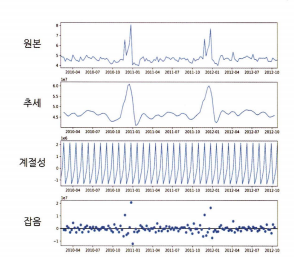 



## 회귀 기반 시계열 분석

예측ㅎ고자 하는 시점 t의 값이 종속변수가 됨 
t에는 해당 요일, ㅝㄹ 등 들이 독립 변수가 된다



추세성을 반영하기 위해 시계열이 시작하는 기준 시점일로부터의 경과일을 독립변수화 한다 (며칠 지났는가?)

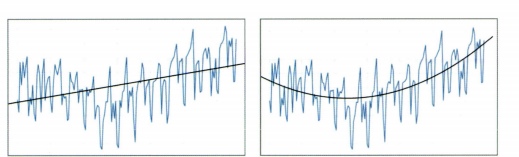  

오른쪽 그림처런 비선형적인 경우 다항회귀나 로그 값을 취해서 변수를 변환해준다. 로그를 사용할 경우 모든 값이 0보다 커야 한다는 점에 주의하자     
또한 과적합 위험도 있다

장점: 외부 요소를 변수로 추가해 주는 것이 용이(할인 여부, 공휴일, 날씨, 경제지표 등), 자기회귀 요소를 반영하여 시차 이동에 따른 수치 변화에 대한 설명력을 보다 높일 수 있음

자기상관함수(ACF)
- Y 수치와 각 $t_0-t_k$시점과의 상관관계를 0.05 유의수준안에서 나타낸 것, 점선으로 되어 있는 가로선을 벗어나면 해당 시차가 y값과 상관성이 있다는 것을 의미  
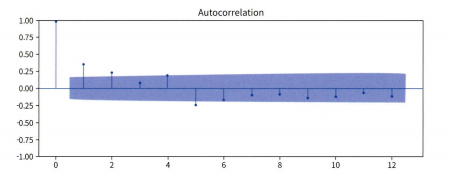  

- 해석자에 따라 경계값은 무시할 수도 있음



## ARIMA 모델

이동평균을 누적한 자기회귀를 이용하여 시계열 분석을 하는 것


In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

ModuleNotFoundError: No module named 'pmdarima'

In [27]:
# 전체 매출 추세 확인

plt.figure(figsize=(22,8))
plt.plot(df_agg.Date2,df_agg.Weekly_Sales)
plt.title("Walmart Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

NameError: name 'df_agg' is not defined

<Figure size 2200x800 with 0 Axes>

In [ ]:
# 시계열 분해용 데이터셋 생성

timeSeries_decomp = df_agg.loc[:, ["Date2","Weekly_Sales"]]
timeSeries_decomp.index = timeSeries_decomp.Date2
ts_decomp = timeSeries_decomp.drop("Date2",axis=1)

ts_decomp.head()

In [ ]:
# 시계열 분해 시각화

# period= 월 별은 12, 주 별은 4, 일 별은 7
decomp = seasonal_decompose(ts_decomp['Weekly_Sales'], model='additive', period=4)

fig = plt.figure()  
fig = decomp.plot()  
fig.set_size_inches(20, 15)
plt.show()

In [ ]:
# ACF, PACF 그래프 시각화

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(ts_decomp, lags=60, ax=ax1)

ax2 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(ts_decomp, lags=60, ax=ax2)

In [ ]:
# 회귀모델 용 데이터셋 가공

# 1~4, 52주 전 시점 패생변수 생성
df_agg['Weekly_Sales_1w'] = df_agg['Weekly_Sales'].shift(1)
df_agg['Weekly_Sales_2w'] = df_agg['Weekly_Sales'].shift(2)
df_agg['Weekly_Sales_3w'] = df_agg['Weekly_Sales'].shift(3)
df_agg['Weekly_Sales_4w'] = df_agg['Weekly_Sales'].shift(4)
df_agg['Weekly_Sales_52w'] = df_agg['Weekly_Sales'].shift(52)

# 모델용 데이터셋 기간 설정
df_agg_set = df_agg[df_agg["Date2"].isin(pd.date_range('2011-02-05', '2012-10-26'))]

# 독립변수, 종속변수 분리
df_x = df_agg_set.drop(['Year','Date2','Weekly_Sales'],axis=1)
df_y = df_agg_set[['Weekly_Sales']]


# 학습셋과 테스트셋 분리하여 생성(6:4)

x_train, x_test, y_train, y_test = train_test_split(
    df_x,df_y,test_size=0.4,random_state=1)

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

In [ ]:
# 다중회귀모델 생성
mreg = LinearRegression(fit_intercept=True)
mreg.fit(x_train, y_train) 

# 테스트셋에 모델 적용
y_predict = mreg.predict(x_test)

# 모델 성능 확인
print("학습셋 R-Square: {:.5f}".format(mreg.score(x_train, y_train)))
print("테스트셋 R-Square: {:.5f}".format(mreg.score(x_test, y_test)))

In [ ]:
# 모델 상세 확인

ols_m = sm.OLS(y_train, sm.add_constant(x_train)).fit()
ols_m.summary()

In [ ]:
# ADF 검정

# p-value가 0.05 미만이므로 대립가설채택. 즉, 정상성 만족.
def ADF(ts_decomp): 
    result = adfuller(ts_decomp.values, autolag="AIC") 
    print("------ Augmented Dickey-Fuller Test ------")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %1.10f' % result[1])
    print('Lag: %d' % result[2])
    print('observation: %d' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
 
ADF(ts_decomp)

In [ ]:
# ARIMA용 학습셋, 테스트셋 생성

train= ts_decomp.loc['2010-02-05':'2012-09-21']
test= ts_decomp.loc['2012-09-28':'2012-10-26']

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(train))
print('test data 개수: ', len(test))

In [ ]:
# ARIMA 예측값 출력

# p,d,q 파라미터값 설정
p, d, q = 3, 0, 3

model_arima = ARIMA(train["Weekly_Sales"], order=(p,d,q)) 
model_arima_fit = model_arima.fit()

# 예측값 출력
pred1 = model_arima_fit.forecast(steps=5)[0]
pred1 = pd.Series(pred1, index=test.index)

print(np.round_(pred1,2))

In [ ]:
# ARIMA 모델 예측값 시각화

fig, ax = plt.subplots(figsize=(15,5))
graph = sns.lineplot(x='Date2', y='Weekly_Sales', data = train)
pred1.plot(ax=ax, color='red', marker="o", legend=True)
test.plot(ax=ax, color='blue', marker="o", legend=True)

In [ ]:
# Auto-ARIMA 모델 예측값 시각화

auto_arima_model = pm.auto_arima(train, seasonal=True, m=52)

# 모델 예측
pred2 = auto_arima_model.predict(5) 
pred2 = pd.Series(pred2, index=test.index)
pred2 = pred2.rename("Auto Arima")

# 예측값 시각화
fig, ax = plt.subplots(figsize=(15,5))
graph = sns.lineplot(x='Date2', y='Weekly_Sales', data = train)
pred2.plot(ax=ax, color='red', marker="o", legend=True)
test.plot(ax=ax, color='blue', marker="o", legend=True)


In [ ]:
# Auto-ARIMA 모델 요약

print(auto_arima_model.summary())

In [ ]:
# 모델 적합성 시각화

auto_arima_model.plot_diagnostics(figsize=(15,5))

## 연관 규칙과 협업 필터링(추천모델)

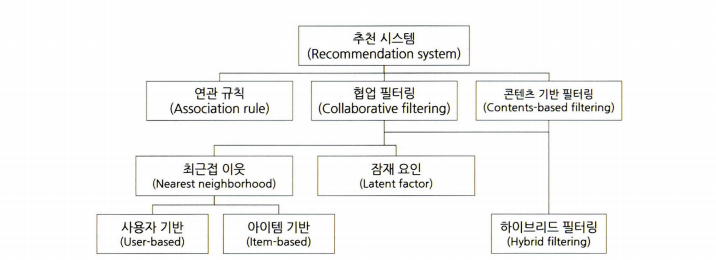




## 연관 규칙
 
A라는 제품을 구매한 사람은 B라는 제품도 구매할 확률이 높다는 결론을 이끌어 냄

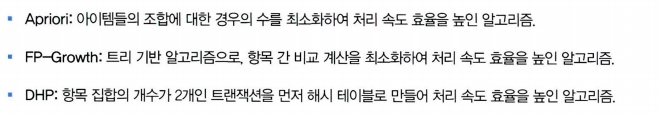

연관규칙 분석의 3가지 지표

1. 지지도(Support): 아이템 A와 B를 동시에 포함하는 거래가 발생할 확률
   
전체 구매 횟수 중에서 해당 아이템 혹은 조합의 구매가 얼마나 발생하는가?     

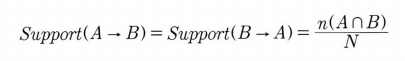  


2. 신뢰도(Coonfidence): 아이템 A가 포함되는 거래에 B가 포함될 조건부 확률
        
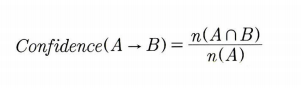

3. 향상도(Lift): 아이템 A와 B가 독립저그로 판매되는 것 대비 함께 되는 비율  

조건절과 결과절의 위치가 바뀌어도 값이 동일     

1을 기준으로 하며, 1에 가까울수록 두 아이템은 서로 독립적이다.  

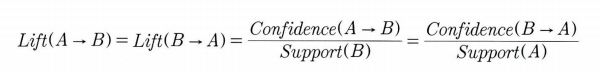


세 척도를 활용한 상품 추천 방법
1. 지지도와 신뢰도 기준을 잡아서 특정 cut off 미만의 아이템 관계를 필터링한다
2. 향상도를 내림차순으로 정렬하여, 상위에 있는 아이템 조합을 최종 선정한다


In [32]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd
import numpy as np

In [34]:
df = pd.read_csv("market_basket.csv")
df.head()

,cust_cd,std_dt,prdct_cd,prdct_nm
0,C617077280704,2021-06-19,A10001,tropical fruit
1,C617077280704,2021-06-19,A10002,whole milk
2,C617077280704,2021-06-19,A10003,pip fruit
3,C617077280704,2021-06-19,A10004,other vegetables
4,C617077280704,2021-06-19,A10005,cream


In [35]:
# apriori 모델 적용을 위한 품목 리스트 가공

itemset = df.drop_duplicates(
    ['cust_cd', 'std_dt', 'prdct_nm']).groupby(
    ['cust_cd','std_dt'])['prdct_nm'].apply(list)

itemset= pd.DataFrame(itemset).reset_index().drop(
    ['cust_cd', 'std_dt'], axis='columns')

itemset = itemset.squeeze()

itemset.head()

0    [beef, herbs, tropical fruit, whole milk, chic...
1    [sugar, packaged fruit/vegetables, sausage, sp...
2    [berries, tropical fruit, fruit/vegetable juic...
3    [yogurt, beef, cream, herbs, chicken, bottled ...
4    [berries, beef, yogurt, specialty bar, bottled...
Name: prdct_nm, dtype: object

In [36]:
# apriori 모델 적용을 위한 장바구니 - 품목 더미 가공

encoder = TransactionEncoder()
encoder_T = encoder.fit(itemset).transform(itemset)

# 데이터프레임으로 변경
itemset_matrix = pd.DataFrame(encoder_T, columns=encoder.columns_) 

itemset_matrix.head()

,beef,berries,beverages,bottled beer,bottled water,brown bread,butter,butter milk,canned beer,chicken,...,sparkling wine,specialty bar,specialty chocolate,sugar,syrup,tropical fruit,turkey,white wine,whole milk,yogurt
0,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,False
2,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,True,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,True,True,False,False,True,False,False,False,False,True,...,False,True,False,False,False,True,False,False,False,True


In [37]:
# 지지도 0.1 기준으로 apriori 적용

itemset_apriori = apriori(itemset_matrix, min_support=0.01, use_colnames=True)
itemset_apriori.head()

,support,itemsets
0,0.166612,(beef)
1,0.105074,(berries)
2,0.017010,(beverages)
3,0.025754,(bottled beer)
4,0.095191,(bottled water)


In [40]:
# 향상도 5 이상 상품 조합 추출
association_rules(itemset_apriori, metric="lift", min_threshold=5) 

TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [ ]:
#협업 필터링
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np


In [44]:
df_movies = pd.read_csv("movies.csv")
df_ratings = pd.read_csv("ratings.csv")

In [45]:
# 고객, 영화 유사도 측정을 위한 전치 데이터셋 생성

# ratings 데이터와 movies 데이터 결합
df_merge = pd.merge(df_ratings, df_movies, on="movieId")

# 고객-아이템 평점 행렬 생성
df_merge_pivot = df_merge.pivot_table("rating", "userId", "title")

# 결측 0으로 변환
df_merge_pivot_null = df_merge_pivot.fillna(0)

# 아이템-사용자 평점 행렬로 전치
df_merge_pivot_T = df_merge_pivot_null.T
df_merge_pivot_T.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# 영화 유사도 행렬 생성
item_sim = cosine_similarity(df_merge_pivot_T)

# 데이터 프레임 형태 변환
item_sim_df = pd.DataFrame(item_sim, index=df_merge_pivot_T.index,
                           columns=df_merge_pivot_T.index)

item_sim_df.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.342682,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.158272,0.0,0.098324,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.147486,0.0
'Round Midnight (1986),0.0,0.0,1.0,0.0,0.0,0.0,0.081094,0.000000,0.257012,0.680414,...,0.000000,0.227429,0.141421,0.0,0.100219,0.0,0.221581,0.0,0.098324,1.0
'Til There Was You (1997),0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
"'burbs, The (1989)",0.0,0.0,0.0,0.0,1.0,0.0,0.031610,0.231897,0.100923,0.000000,...,0.057358,0.000000,0.000000,0.0,0.212684,0.0,0.104192,0.0,0.161820,0.0


In [47]:
# 500일의 썸머와 유사도가 높은 상위 5개 영화 추출

item_sim_df["(500) Days of Summer (2009)"].sort_values(ascending=False)[1:6]

title
Scott Pilgrim vs. the World (2010)    0.502121
Up in the Air (2009)                  0.498354
Social Network, The (2010)            0.497004
Forgetting Sarah Marshall (2008)      0.472271
Shutter Island (2010)                 0.468202
Name: (500) Days of Summer (2009), dtype: float64

In [48]:
# 고객 유사도 행렬 생성
user_sim = cosine_similarity(df_merge_pivot_null)

# 데이터 프레임 형태 변환
user_sim_df = pd.DataFrame(user_sim, index=df_merge_pivot_null.index,
                           columns=df_merge_pivot_null.index)

user_sim_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.101113,0.210044,0.128766,0.057896,0.077130,0.358090,0.097434,0.239189,0.026663,...,0.291162,0.144741,0.106583,0.091049,0.236805,0.154519,0.245071,0.238660,0.278217,0.153493
2,0.101113,1.000000,0.115559,0.034610,0.032705,0.028305,0.062914,0.471918,0.194232,0.000000,...,0.068325,0.000000,0.477330,0.146887,0.163553,0.061737,0.050948,0.051423,0.035907,0.064822
3,0.210044,0.115559,1.000000,0.058208,0.044426,0.012816,0.084522,0.066620,0.459703,0.068454,...,0.152078,0.301021,0.081626,0.098949,0.310234,0.079452,0.092821,0.080940,0.158943,0.109658
4,0.128766,0.034610,0.058208,1.000000,0.019298,0.005781,0.059089,0.024420,0.050572,0.000000,...,0.055860,0.024329,0.040467,0.108881,0.076241,0.014011,0.042643,0.174275,0.061677,0.157809
5,0.057896,0.032705,0.044426,0.019298,1.000000,0.053378,0.080822,0.041536,0.023168,0.011915,...,0.058450,0.007315,0.024708,0.038163,0.053085,0.048993,0.055431,0.026053,0.086667,0.068281


In [49]:
# 7번 고객과 유사도가 높은 상위 5명 추출

user_sim_df[7].sort_values(ascending=False)[1:6]

userId
403    0.432287
358    0.414600
228    0.396949
328    0.391268
590    0.387817
Name: 7, dtype: float64

In [50]:
# 협업 필터링용 샘플 행렬 생성

# 잠재요인 차원 30으로 설정
K=30

# 샘플용 영화 30개만 필터링
df_merge_sample = df_merge_pivot.iloc[:,0:30]
df_array = df_merge_sample.values
user_cnt, item_cnt = df_array.shape

# 고객수, 영화 수 x 자원 수 행렬 행성
np.random.seed(47)
user_matrix = np.random.normal(scale=1./K, size=(user_cnt, K))
item_matrix = np.random.normal(scale=1./K, size=(item_cnt, K))

print("고객 행렬 확인:", user_matrix.shape)
print("영화 행렬 확인:", item_matrix.shape)

고객 행렬 확인: (668, 30)
영화 행렬 확인: (30, 30)


In [51]:
# RMSE 함수 정의

def get_rmse(df_array, user_matrix, item_matrix, not_nan_index):
    error = 0
    # 예측용 df_array 생성
    pred_rating_matrix = user_matrix @ item_matrix.T
    
    # 결측 없는 실제 행렬과 예측 행렬 생성
    df_array_not_null = df_array[not_nan_index]
    pred_rating_matrix_not_null = pred_rating_matrix[not_nan_index]
    
    # RMSE 산출
    mse = mean_squared_error(df_array_not_null, pred_rating_matrix_not_null)
    rmse = np.sqrt(mse)
    
    return rmse

In [52]:
# 행렬 분해 함수 정의

def matrix_factorization(df_array, K, steps=1000, 
                         learning_rate=0.01, r_lambda = 0.01):
     
    # 결측값이 아닌 df_array의 index 생성
    not_nan_index = np.where(np.isnan(df_array) == False)
    
    # SGD 행렬 분해 알고리즘 적용
    for step in range(steps):
        for p, q, r in zip(not_nan_index[0], not_nan_index[1]
                           ,df_array[not_nan_index]):
            # 실제 값과 예측 값 차이 계산
            r_pq = user_matrix[p, :] @ item_matrix[q, :].T
            error_pq = r - r_pq

            # SGD 
            user_matrix[p,:] = user_matrix[p,:] + learning_rate*(
                error_pq * item_matrix[q, :] - r_lambda*user_matrix[p,:])
            
            item_matrix[q,:] = item_matrix[q,:] + learning_rate*(
                error_pq * user_matrix[p, :] - r_lambda*item_matrix[q,:])

        rmse = get_rmse(df_array, user_matrix, item_matrix, not_nan_index)

        if ( (step + 1)  % 100) == 0 :
            print("반복 횟수: ", step + 1 ," RMSE: ", np.round(rmse,3))
            
    return user_matrix, item_matrix

In [53]:
# 행렬 분해, 내적

user_matrix, item_matrix = matrix_factorization(
    df_array, K, steps=1000,
    learning_rate=0.01, r_lambda = 0.01)

pred_matrix = user_matrix @ item_matrix.T

반복 횟수:  100  RMSE:  0.097
반복 횟수:  200  RMSE:  0.027
반복 횟수:  300  RMSE:  0.024
반복 횟수:  400  RMSE:  0.023
반복 횟수:  500  RMSE:  0.021
반복 횟수:  600  RMSE:  0.02
반복 횟수:  700  RMSE:  0.02
반복 횟수:  800  RMSE:  0.019
반복 횟수:  900  RMSE:  0.019
반복 횟수:  1000  RMSE:  0.018


In [54]:
# 데이터 프레임 변환
ratings_pred_matrix = pd.DataFrame(data=pred_matrix, 
                                   index= df_merge_sample.index,
                                   columns = df_merge_sample.columns)

ratings_pred_matrix.head(5)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,"10th Kingdom, The (2000)",11-11-11 (11-11-11: The Prophecy) (2011),11:14 (2003),"11th Hour, The (2007)",12 (2007),12 Angry Men (1957),12 Angry Men (1997),12 Rounds (2009),12 Years a Slave (2013),127 Hours (2010)
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.051631,-0.083938,-0.069660,-0.105834,-0.186691,-0.094306,-0.098581,-0.177139,-0.103241,-0.082794,...,-0.045882,-0.079783,-0.112016,-0.110756,-0.034177,-0.163101,-0.076059,-0.051933,-0.128448,-0.113047
2,0.068995,0.063763,0.029378,0.103909,0.070665,0.035862,0.094289,0.170707,0.130561,0.053904,...,0.134833,0.066054,0.067439,0.097416,0.013622,0.127945,-0.041964,0.049973,0.106233,0.082817
3,0.128438,0.089740,0.090381,0.066533,0.103108,0.031881,0.212484,0.048289,0.182902,0.070970,...,0.142718,0.191402,0.256842,0.230997,0.064861,0.149501,-0.003335,0.198401,0.207483,0.198376
4,2.895991,1.712282,1.787002,2.657818,2.820935,2.213617,2.082815,2.555981,3.306608,2.252366,...,1.648483,1.936613,2.729978,2.677794,1.100380,4.981980,0.620007,2.018014,3.723871,2.951902
5,0.001853,0.076697,-0.039216,-0.029270,-0.007633,-0.051874,-0.026496,0.004058,0.040571,-0.024389,...,0.042998,0.052845,0.024583,0.030629,-0.026081,-0.008237,0.040031,0.000849,0.007089,-0.021943


In [55]:
# 영화 추천을 위한 함수 설정

# 미상영 영화 리스트 추출 함수
def get_unseen_movies(df_merge_sample, userId):

    # 모든 영화 리스트 생성
    movies_list = df_merge_sample.columns.tolist()
    
    # 고객 별 평점 테이블 생성
    ratings = df_merge_sample.loc[userId,:]
    
    # 평점을 메기지 않은 영화 리스트 생성
    none_rating_list = ratings[ratings.isnull()].index.tolist()
    
    # 평점 없는 영화로 미상영 영화 리스트 생성
    unseen_movie_list = [ movie for movie in movies_list if movie in none_rating_list]
    
    return unseen_movie_list

# 미상영 영화 중 예측 점수가 높은 순으로 정렬
def recomm_movie_by_userid(pred_df, userId, unseen_movie_list, top_n=10):    
    recomm_movies = pred_df.loc[userId, unseen_movie_list
                               ].sort_values(ascending=False)[:top_n]
    
    return recomm_movies

In [56]:
# 575번 고객의 추천 영화 리스트 생성

# 575번 고객의 미상영 영화 리스트 생성
unseen_movie_list = get_unseen_movies(df_merge_sample, 575)

# 미상영 영화 중 예측 평점 높은 영화 리스트 생성
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 575
                                       ,unseen_movie_list, top_n=10)

# 최종 데이터셋 생성
recomm_movies = pd.DataFrame(data=recomm_movies.values,
                             index=recomm_movies.index,
                             columns=['pred_score']).reset_index()

recomm_movies.head(10)

,title,pred_score
0,12 Years a Slave (2013),3.569347
1,127 Hours (2010),3.362532
2,101 Dalmatians (One Hundred and One Dalmatians...,2.968062
3,10 Items or Less (2006),2.949394
4,11:14 (2003),2.884700
5,"11th Hour, The (2007)",2.742791
6,*batteries not included (1987),2.701928
7,'71 (2014),2.672483
8,12 Rounds (2009),2.585290
9,10th & Wolf (2006),2.489459
